In [1]:
import pandas as pd
import pickle

from xgb_model_functions import SplitModel
from preproc_functions import pre_process

In [2]:
# python3 harness.py --input_csv  <input file in csv> --output_csv <output csv file path to which the predictions are written> 

In [3]:
input_path = 'harness_test.csv'
output_path = 'results.csv'

 The output should be a csv with a single column with PD estimates corresponding to the testing input rows. Your output should not have a header

In [4]:
# Load pre computed data from training which is used for growth features
historical_data = pd.read_csv('historical_features.csv',index_col=0)
historical_data['stmt_date'] = pd.to_datetime(historical_data['stmt_date'])

# custom bins for certain featured
with open('custom_bins.pkl', 'rb') as inp:
    custom_bins = pickle.load(inp)

with open('preproc_params.pkl', 'rb') as inp:
    preproc_params = pickle.load(inp)

with open('trained_model.pkl', 'rb') as inp:
    trained_model = pickle.load(inp)
print('Loaded trained model')

# read and process holdout
holdout_df = pd.read_csv(input_path,index_col=0)

holdout_df['stmt_date'] = pd.to_datetime(holdout_df['stmt_date'])
holdout_df['def_date'] = pd.to_datetime(holdout_df['def_date'], format="%d/%m/%Y")
holdout_df.sort_values('stmt_date', inplace=True)

test_data_proc , preproc_params = pre_process(holdout_df, 
                                         historical_df=historical_data, 
                                         new=False, 
                                         preproc_params = preproc_params,  
                                         quantiles = 50, 
                                         days_until_statement = 150)

predictions = trained_model.predict(test_data_proc)
print("Predictions done")

Loaded trained model
asst_tot_quantile
financial_leverage_quantile
profitability_ratio_quantile
roe_quantile
net_income_growth_quantile
quick_ratio_v2_quantile
sales_growth_quantile
cash_assets_ratio_quantile
dscr_quantile
using training pds for ateco_sector
using training pds for sector_group
using training pds for regional_code
cfo_quantile
using training pds for legal_struct
rec data length 177040
first data length 22960
Predictions done


In [5]:
predictions.to_csv(output_path,index=False,header=False)

In [7]:
results = pd.read_csv('results.csv', header=None)
results.head()

,0
0,0.003589
1,0.003589
2,0.003589
3,0.003589
4,0.003589


In [8]:
test_results = test_data_proc[['default']].copy()
test_results['predictions'] = results.values

In [9]:
from sklearn import metrics

ROC AUC 0.8770293826222755


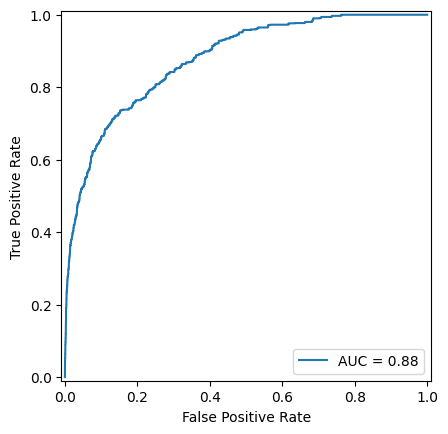

In [10]:
fpr, tpr, thresholds = metrics.roc_curve(test_results['default'], test_results['predictions'])
roc_auc = metrics.auc(fpr, tpr)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
print(f'ROC AUC {roc_auc}')
roc_display.plot()